<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/application_model_zoo/Example%20-%20Brackish%20Water%20Creatures%20Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brackish Water Creature Identification

## Table of contents


### 1. Installation Instructions



### 2. Use trained model to classify creatures found in Brackish Water



### 3. How to train the model from scratch

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/16_mmdet/installation
     
 - Select the right requirements file and run
 
     - chmod +x install.sh && ./install.sh

In [1]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 360, done.
remote: Counting objects: 100% (360/360), done.
remote: Compressing objects: 100% (302/302), done.
remote: Total 9419 (delta 178), reused 175 (delta 55), pack-reused 9059
Receiving objects: 100% (9419/9419), 241.84 MiB | 42.20 MiB/s, done.
Resolving deltas: 100% (3874/3874), done.
Checking out files: 100% (7627/7627), done.


In [ ]:
! cd Monk_Object_Detection/16_mmdet/installation && chmod +x install.sh && ./install.sh

# Running a classifier using pretrained weights

In [8]:
import os
import sys
sys.path.append("Monk_Object_Detection/16_mmdet/lib")

In [9]:
from infer_engine import Infer

In [10]:
gtf = Infer();

### Downloading the trained model

In [1]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1w1dnwvOey5H5IvkVBsbp99p3zlnUdi-v' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1w1dnwvOey5H5IvkVBsbp99p3zlnUdi-v" -O obj_brackish_trained.zip && rm -rf /tmp/cookies.txt

--2020-09-24 11:58:33--  https://docs.google.com/uc?export=download&id=1w1dnwvOey5H5IvkVBsbp99p3zlnUdi-v
Resolving docs.google.com (docs.google.com)... 172.217.6.14, 2607:f8b0:4009:815::200e
Connecting to docs.google.com (docs.google.com)|172.217.6.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.18K  --.-KB/s    in 0s      

2020-09-24 11:58:34 (51.5 MB/s) - written to stdout [3258]

--2020-09-24 11:58:34--  https://docs.google.com/uc?export=download&confirm=fF75&id=1w1dnwvOey5H5IvkVBsbp99p3zlnUdi-v
Resolving docs.google.com (docs.google.com)... 172.217.6.14, 2607:f8b0:4009:815::200e
Connecting to docs.google.com (docs.google.com)|172.217.6.14|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-04-docs.googleusercontent.com/docs/securesc/2trcpadc16d5bosfil10mn1fk27qp9kr/ejh5crgksqjrurocfi27rkl9qimn2htb/1600948

In [2]:
! unzip -qq obj_brackish_trained.zip

### Loading the trained model, and testing on test images

In [12]:
#Loading the model

gtf.Model_Params("Brackish_work_dir/config_updated.py", 
                 "Brackish_work_dir/latest.pth")

In [13]:
# Passing a test image 

result = gtf.Predict(img_path="Brackish_work_dir/Test Image/test_image2.png",
           out_img_path="test1.png",
           thresh=0.5);

Inference Time: 0.34798526763916016 sec
Saving Time: 0.031022310256958008 sec


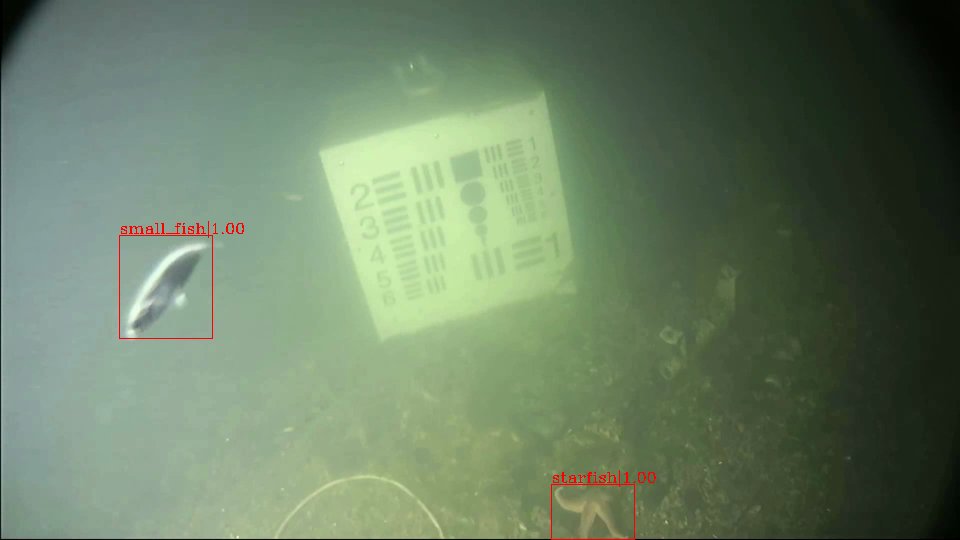

In [14]:
#Display the final image using IPython
from IPython.display import Image
Image(filename='test1.png')

In [15]:
# Passing another test image

result = gtf.Predict(img_path="Brackish_work_dir/Test Image/test_image3.png",
           out_img_path="test2.png",
           thresh=0.5);

Inference Time: 0.14800477027893066 sec
Saving Time: 0.031113147735595703 sec


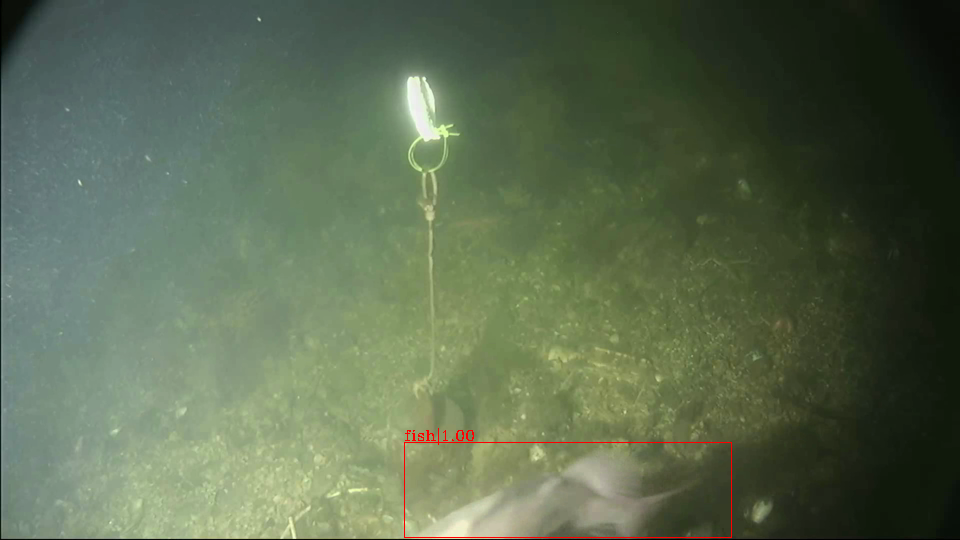

In [16]:
# Display image

from IPython.display import Image
Image(filename='test2.png')

# Download Dataset

  - Credits: https://www.kaggle.com/aalgoruniversity/brackish-dataset/data
  
  

<p>Once the dataset is downloaded, the vidoes of various creatures are given, now the first task is to extract the images, to get images to train our model</p>

### Extracting images from Videos

In [ ]:
import os
import subprocess
import argparse
import pathlib
import ipdb

image_types = ['.png', '.jpg', '.jpeg']
video_types = ['.avi', '.mp4']

def extractFrames(args):
    main_dir = args["inputFolder"]
    output_dir = args["outputFolder"]
    
    print(main_dir)
    for filename in os.listdir(os.path.normpath(main_dir)):
            
            print(filename)
            if os.path.splitext(filename)[1].lower() in video_types:
                videoFile = os.path.join(os.path.abspath(main_dir), filename)

                if output_dir != '':
                    fileFolder = output_dir
                else:
                    fileFolder = os.path.splitext(videoFile)[0]
                
                #print(fileFolder)
                pathlib.Path(os.path.abspath(fileFolder)).mkdir(exist_ok=True, parents=True)

                fileprefix = os.path.join(fileFolder, os.path.splitext(filename)[0])
                #print(fileprefix)
                cmd_command = ["ffmpeg", "-i", videoFile, "-vf", "scale=960:540", "-sws_flags", "bicubic", "{}-%04d.png".format(fileprefix), "-hide_banner"]
                subprocess.call(cmd_command)

                # Create a .txt file with the names of all the image files in the respective folder
                dirContent = os.listdir(fileFolder)
                for fi in dirContent:
                    if os.path.splitext(fi)[1] in image_types:
                        with open("{}".format(os.path.join(fileFolder, "inputList.txt")), "a") as f:
                            f.write("{}\n".format(fi))


if __name__ == "__main__":
    ap = argparse.ArgumentParser(description = "Takes a set of videos and extracts the frames into separate folders")
    ap.add_argument("-in", "--inputFolder", type=str, required = True, help="Path to the main folder containing all the videos")
    ap.add_argument("-out", "--outputFolder", type=str, required = False, help="Path the image output folder. NOTE: if no outputfolder argument is provided, the images will be placed in folders corresponding to their respective video-names; if an argument IS given, all images will be placed in a folder with the provided argument name.", default='')

    args = vars(ap.parse_args())

    extractFrames(args)
    
    

<p> Once the above script is executed, the images from the videos will be extracted</p>


## Generating the train, validation and test dataset

<p> The dataset also includes the names of images, for the train, test, and validation dataset.I had a small script written to segregate the images respectively. </p>

In [ ]:
import pandas as pd
import shutil

def dataset_maker(src_path,dest_path,text_path):
    
    names = pd.read_csv(text_path, sep=" ", header=None)
    src_list = []
    
    for i in range(len(names[0])):
        
        l=len(names[0][i])
        src = src_path+names[0][i][:(l-9)]+"/"+names[0][i] 
        src_list.append(src)
        
    
    for i in range(len(src_list)):
        shutil.move(src_list[i],dest_path)
    

In [ ]:
dataset_maker("video_images","train_images","train.txt")    

In [ ]:
dataset_maker("video_images","validation_images","valid.txt")     

In [ ]:
dataset_maker("video_images","test_images","test.txt")    

## Generating COCO Annotations, to train the model


<p> The MONK Annotation for the dataset was already given, so the task is to convert it to the COCO format. </p>

In [ ]:
import cv2
import json
import numpy as np
import os
import sys
import pandas as pd
import argparse
import pathlib

def importCategories(name_file):
    # Import category names list
    categoryLabels = dict()
    categoryNumbers = dict()

    with open(name_file) as f:
        lineNumber = 1

        for line in f:
            entries = line.replace('\n', '')

            if len(entries) > 1:
                number = lineNumber
                label = entries

                categoryLabels[int(number)] = label
                categoryNumbers[label] = int(number)

            lineNumber += 1

    return (categoryLabels, categoryNumbers)


def imageToDictEntry(imagePath, imageId, shortPath):
    imageFile = cv2.imread(imagePath)

    image = dict()

    if imageFile is not None:
        height, width, _ = imageFile.shape

        # Image dictionary
        image = dict()
        image['file_name'] = shortPath
        
        image['width'] = width
        image['height'] = height
        image['id'] = imageId
        
    else:
        print("Could not read: " + imagePath)

    return image

def annotationToDictEntry(df_entry, annotationId, imageToIDDict, categoryToNumberDict):
    annotation = dict()
    tl_x = df_entry["Upper left corner X"]
    tl_y = df_entry["Upper left corner Y"]
    br_x = df_entry["Lower right corner X"]
    br_y = df_entry["Lower right corner Y"]
    width = br_x-tl_x
    height = br_y-tl_y
    annotation["id"] = annotationId
    annotation["image_id"]= imageToIDDict[df_entry["Filename"]]
    annotation["segmentation"]=[]
    annotation["ignore"]=0
    annotation["area"] = width*height
    annotation["iscrowd"] = 0
    annotation["bbox"] = [tl_x, tl_y, width, height]
    annotation["category_id"] = categoryToNumberDict[df_entry["Annotation tag"]]
    
    
    
    
    

    return annotation

def createCategoryList(categoryLabels):
    categories = []

    for catId, name in categoryLabels.items():
        catEntry = dict()
        catEntry['supercategory'] = 'Master'
        catEntry['id'] = catId
        catEntry['name'] = name

        categories.append(catEntry)

    return categories


def AAUToCOCO():
    # Import category names list
    #datasetSplit = args["datasetSplit"]
    outPath = "/home/aanisha/Desktop/Tesselate/dataset/" # The output folder path
    imageFolderPath = "/home/aanisha/Desktop/Tesselate/dataset/Valid_images" # The image folder path
    annotationPath = "/home/aanisha/Desktop/Tesselate/annotations/annotations_AAU/valid.csv" #Path to MONK Annotation
    categoryfilePath = "/home/aanisha/Desktop/Tesselate/scripts/Brackish.names" #Path to file containing class names
    categoryLabels, categoryNumbers = importCategories(categoryfilePath)
    categoryList = createCategoryList(categoryLabels)

    annotations_df = pd.read_csv(annotationPath)

    images = []
    annotations = []
    idToImageLookupTable = dict()
    imageToIdLookupTable = dict()
    imageIdCounter = 0
    annotationIdCounter = 0

    for filename in annotations_df["Filename"].unique():
        basename = os.path.basename(filename)
        imageIdCounter += 1
        image = imageToDictEntry(os.path.join(os.path.abspath(imageFolderPath),filename), imageIdCounter, basename)

        idToImageLookupTable[imageIdCounter] = basename
        imageToIdLookupTable[basename] = imageIdCounter

        images.append(image)


    for index, row in annotations_df.iterrows():
        annotationIdCounter += 1
        try:
            annotation = annotationToDictEntry(row, annotationIdCounter, imageToIdLookupTable, categoryNumbers)
        except Exception as e:
            print(repr(e))
            print("ERROR: It seems that something is wrong with the annotations dataframe.\nPlease ensure that:\n - the annotations are structured correctly\n - the annotation-file (.csv) delimiter is set to be a semi-colon ;\n - the input arguments are correct (e.g., -split and -annotationCSV should point toward the same dataset split)")
            print("Closing...")
            sys.exit()
        annotations.append(annotation)



    """dataset_info = {'Description': datasetSplit,
                    "url": "",
                    "version": "0.0.2",
                    "year": 2020,
                    "Contributor": "Visual Analysis of People lab, AAU",
                    "date_created": "21-08-2020"}"""

    

    gtDict = dict(type= "instances",
                images = images,
                annotations = annotations,
                categories = categoryList)

    pathlib.Path(outPath).mkdir(parents=True,exist_ok=True)

    with open(os.path.join(outPath, '{}_groundtruth.json'.format("valid")), 'w') as outfile:
        json.dump(gtDict, outfile)

    lookupDict = dict(idToImageLookupTable = idToImageLookupTable,
                    imageToIdLookupTable = imageToIdLookupTable,
                    categoryNametoId = categoryNumbers,
                    categoeryIdtoName = categoryLabels)

    with open(os.path.join(outPath, '{}_helper_dirs.json'.format("valid")), 'w') as outfile:
        json.dump(lookupDict, outfile)



if __name__ == "__main__":
    

    AAUToCOCO()

<p> Execute and run the above code, for the Train,Validation, to get the corresponding COCO Annotations </p>

<p> The processed data is stored in Google Drive, and is loaded directly, to use </p>

In [5]:


!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1JY0jj-2Uic_mKeCBZqUzKGa-Rg_OFa3m' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1JY0jj-2Uic_mKeCBZqUzKGa-Rg_OFa3m" -O brackish.zip && rm -rf /tmp/cookies.txt



--2020-09-20 13:54:04--  https://docs.google.com/uc?export=download&id=1JY0jj-2Uic_mKeCBZqUzKGa-Rg_OFa3m
Resolving docs.google.com (docs.google.com)... 172.217.5.14, 2607:f8b0:4009:806::200e
Connecting to docs.google.com (docs.google.com)|172.217.5.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.17K  --.-KB/s    in 0s      

2020-09-20 13:54:05 (50.2 MB/s) - written to stdout [3247]

--2020-09-20 13:54:05--  https://docs.google.com/uc?export=download&confirm=KMw9&id=1JY0jj-2Uic_mKeCBZqUzKGa-Rg_OFa3m
Resolving docs.google.com (docs.google.com)... 172.217.5.14, 2607:f8b0:4009:806::200e
Connecting to docs.google.com (docs.google.com)|172.217.5.14|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-9o-docs.googleusercontent.com/docs/securesc/ni6sk77km92i8mhh2cmrmuhcvh5sog7v/8i14nla1lahdrnrjkt84r6270amb93hk/1600610

In [6]:
!unzip brackish.zip

Archive:  brackish.zip
   creating: dataset/
  inflating: dataset/Brackish.names  
   creating: dataset/Brackish water data/
  inflating: dataset/Brackish water data/test_groundtruth.json  
  inflating: dataset/Brackish water data/train_groundtruth.json  
  inflating: dataset/Brackish water data/test_helper_dirs.json  
  inflating: dataset/Brackish water data/train_helper_dirs.json  
  inflating: dataset/Brackish water data/valid_groundtruth.json  
  inflating: dataset/Brackish water data/valid_helper_dirs.json  
   creating: dataset/Train_images/
  inflating: dataset/Train_images/2019-02-22_22-31-28to2019-02-22_22-31-38_1-0001.png  
  inflating: dataset/Train_images/2019-02-22_22-31-28to2019-02-22_22-31-38_1-0007.png  
  inflating: dataset/Train_images/2019-02-22_22-31-28to2019-02-22_22-31-38_1-0030.png  
  inflating: dataset/Train_images/2019-02-22_22-31-28to2019-02-22_22-31-38_1-0033.png  
  inflating: dataset/Train_images/2019-02-22_22-31-28to2019-02-22_22-31-38_1-0066.png  
  infl

## Training the model

In [3]:
import os
import sys
sys.path.append("Monk_Object_Detection/16_mmdet/lib")

### Initialize and load the additional libraries

In [5]:
from train_engine import Detector

/home/ubuntu/anaconda3/lib/python3.8/site-packages/setuptools/distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


In [6]:
gtf = Detector();

In [8]:
!pip install pillow==6.2.1

     |████████████████████████████████| 2.1 MB 2.8 MB/s eta 0:00:01
ERROR: monk-pytorch-cuda101 0.0.1 has requirement pillow==6.0.0, but you'll have pillow 6.2.1 which is incompatible.
  Attempting uninstall: pillow
    Found existing installation: Pillow 6.0.0
    Uninstalling Pillow-6.0.0:
      Successfully uninstalled Pillow-6.0.0


In [9]:
!pip install "git+https://github.com/open-mmlab/cocoapi.git#subdirectory=pycocotools"

  Cloning https://github.com/open-mmlab/cocoapi.git to /tmp/pip-req-build-9_fknap6
  Running command git clone -q https://github.com/open-mmlab/cocoapi.git /tmp/pip-req-build-9_fknap6
  Created wheel for mmpycocotools: filename=mmpycocotools-12.0.3-cp38-cp38-linux_x86_64.whl size=311609 sha256=1b740a0b04e4945060b68ba13f049a8b3449b74448b7f894c6b602e0fadf12d2
  Stored in directory: /tmp/pip-ephem-wheel-cache-sllv7idd/wheels/dd/3d/4d/f4b87a8cd4b3563a71af77c1a1d0da332279ec568ce3c58395
Successfully built mmpycocotools
  Attempting uninstall: mmpycocotools
    Found existing installation: mmpycocotools 12.0.2
    Uninstalling mmpycocotools-12.0.2:
      Successfully uninstalled mmpycocotools-12.0.2


In [13]:
img_dir = "dataset/Train_images"; # Image folder
annofile = "train_groundtruth.json" # Annotation file
class_file = "brackish.txt" # Class labels

gtf.Train_Dataset(img_dir, annofile, class_file);

In [14]:
#Optional for Validation data

img_dir = "dataset/Valid_images";
annofile = "valid_groundtruth.json"

gtf.Val_Dataset(img_dir, annofile);

In [15]:
gtf.Dataset_Params(batch_size=2, num_workers=2) # Set the parameters

In [16]:
gtf.Model_Params(model_name="faster_rcnn_x101_64x4d_fpn"); # Choose a model

In [18]:
gtf.Hyper_Params(lr=0.02, momentum=0.9, weight_decay=0.0001); # Set the Hyperparameters

In [19]:
gtf.Training_Params(num_epochs=50, val_interval=1); # Set no of epochs

In [ ]:
gtf.Train(); # Start training

2020-09-20 14:29:41,616 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.8.3 (default, Jul  2 2020, 16:21:59) [GCC 7.3.0]
CUDA available: True
CUDA_HOME: /usr/local/cuda-10.0
NVCC: Cuda compilation tools, release 10.0, V10.0.130
GPU 0: Tesla V100-SXM2-16GB
GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
PyTorch: 1.4.0
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - Intel(R) Math Kernel Library Version 2020.0.1 Product Build 20200208 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v0.21.1 (Git Hash 7d2fd500bc78936d1d648ca713b901012f470dbc)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - NNPACK is enabled
  - CUDA Runtime 10.1
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,code=sm_61;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_37


loading annotations into memory...
Done (t=0.15s)
creating index...
index created!


2020-09-20 14:30:30,127 - mmdet - INFO - load checkpoint from https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_x101_64x4d_fpn_1x_coco/faster_rcnn_x101_64x4d_fpn_1x_coco_20200204-833ee192.pth


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


Downloading: "https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_x101_64x4d_fpn_1x_coco/faster_rcnn_x101_64x4d_fpn_1x_coco_20200204-833ee192.pth" to /home/ubuntu/.cache/torch/checkpoints/faster_rcnn_x101_64x4d_fpn_1x_coco_20200204-833ee192.pth


2020-09-20 14:31:19,675 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([7, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([7]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([24, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([24]).
2020-09-20 14:31:19,679 - mmdet - INFO - Start running, host: ubuntu@ip-172-31-6-128, work_dir: /home/ubuntu/Desktop/Brackish water object detection/work_dirs/config_updated
2020-09-20 14:31:19,679 - mmdet - INFO - workflow: [('train', 1)

## Testing the trained model

<p> Once the model is trained, we can draw inference on how the model is performing. For the above model, it has a threshold value of 0.5. However the model can be trained more, to even fine tune the performance</p>

In [2]:
import os
import sys
sys.path.append("Monk_Object_Detection/16_mmdet/lib")

In [6]:
from infer_engine import Infer

In [4]:
gtf = Infer();

In [7]:
# We will pass the weights

gtf.Model_Params("work_dirs/config_updated/config_updated.py", 
                 "work_dirs/config_updated/latest.pth")

In [11]:
result = gtf.Predict(img_path="dataset/Test_images/2019-02-20_19-23-53to2019-02-20_19-24-12_1-0234.png",
           out_img_path="new4.png",
           thresh=0.5);

Inference Time: 0.14492011070251465 sec
Saving Time: 0.03027033805847168 sec


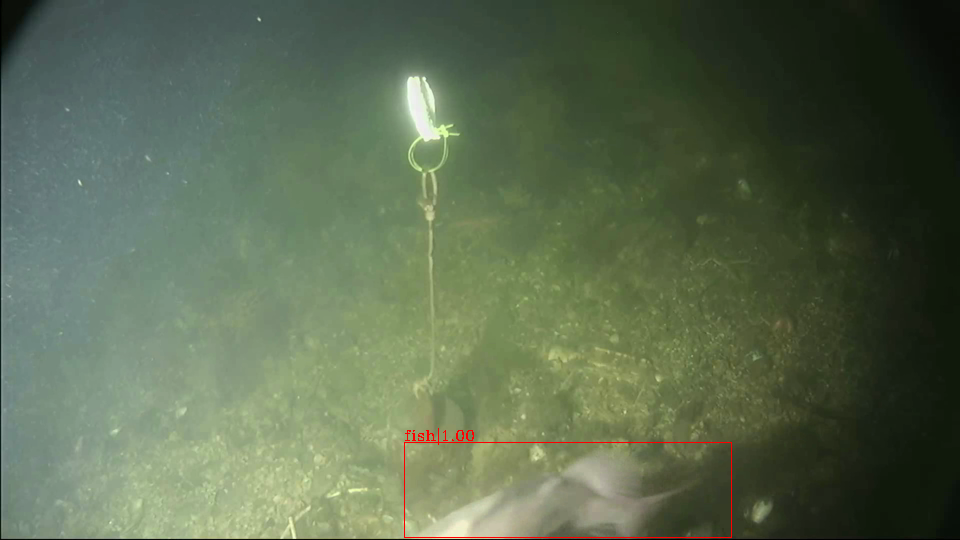

In [13]:
from IPython.display import Image
Image(filename='new4.png')

In [10]:
#

result = gtf.Predict(img_path="dc-Cover-eos4260sdc97h2h41ni944nrs1-20180325133624.Medi.jpeg",
           out_img_path="new7.png",
           thresh=0.5);

Inference Time: 0.1409773826599121 sec
Saving Time: 0.026965618133544922 sec


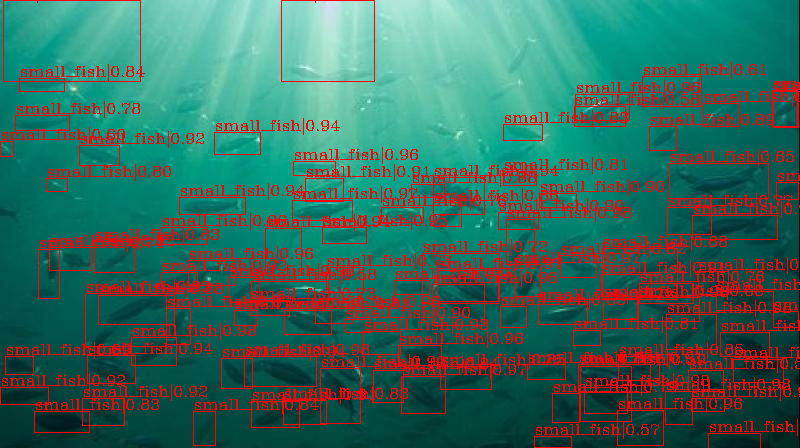

In [12]:
from IPython.display import Image
Image(filename='new7.png')

In [11]:


result = gtf.Predict(img_path="dataset/Test_images/2019-03-19_18-15-37to2019-03-19_18-15-45_1-0056.png",
           out_img_path="Image3.png",
           thresh=0.5);

Inference Time: 0.1538710594177246 sec
Saving Time: 0.026421546936035156 sec


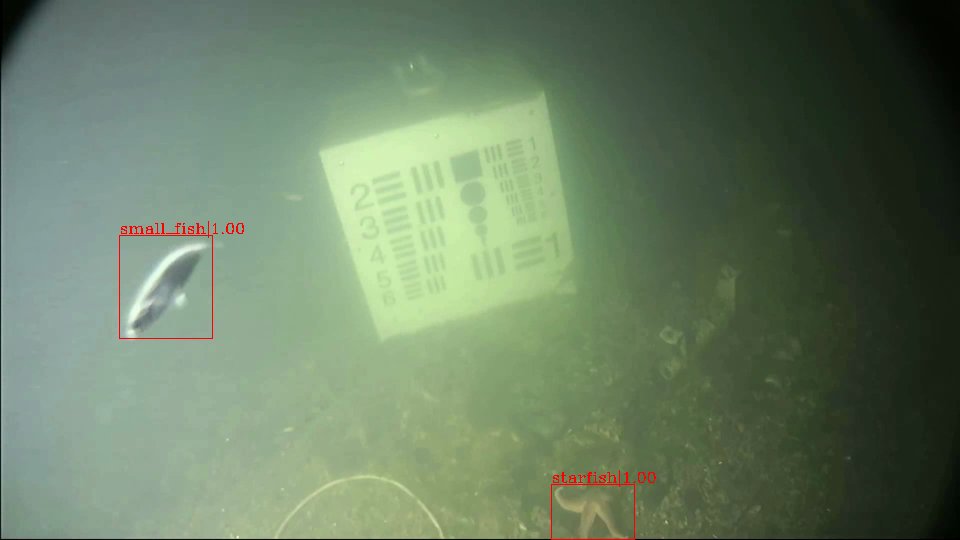

In [12]:
from IPython.display import Image
Image(filename='Image3.png')

In [6]:
#

result = gtf.Predict(img_path="dataset/Test_images/2019-02-22_22-22-16to2019-02-22_22-22-27_1-0065.png",
           out_img_path="Image4.png",
           thresh=0.5);

Inference Time: 0.15898609161376953 sec
Saving Time: 0.027431249618530273 sec


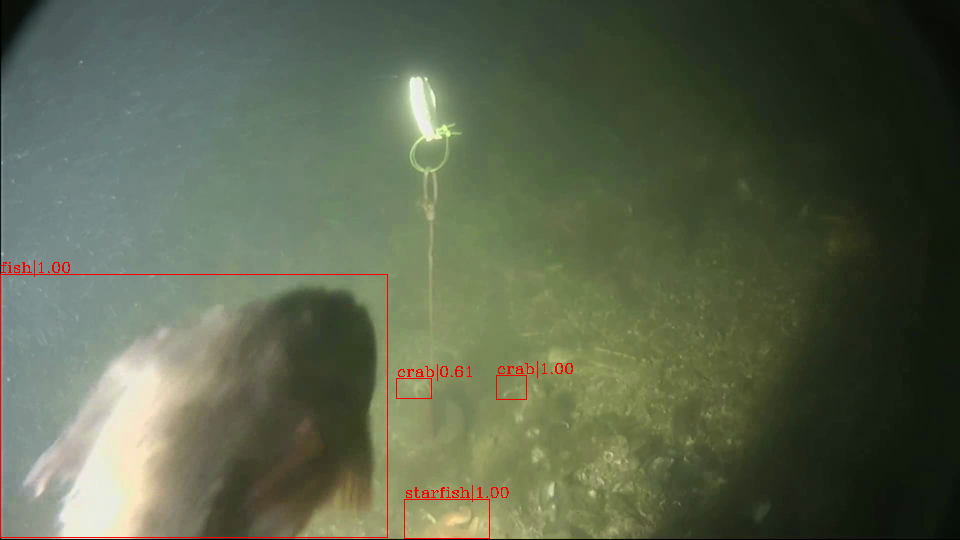

In [7]:
from IPython.display import Image
Image(filename='Image4.png')